In [348]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

### kNN regression and linear regresssion on the used cars dataset using both linear algebra and scikit learn
- Tiffany Kashima

In [349]:
#read in used car CSV file

df = pd.read_csv('/Users/tk/ASU/STP494/data/susedcars.csv')

In [350]:
#do an initial exploration of the data

print(df.info())
print(df.shape)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1000 non-null   int64  
 1   trim          1000 non-null   object 
 2   isOneOwner    1000 non-null   object 
 3   mileage       1000 non-null   float64
 4   year          1000 non-null   int64  
 5   color         1000 non-null   object 
 6   displacement  1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None
(1000, 7)


,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


array([[<AxesSubplot:title={'center':'mileage'}>]], dtype=object)

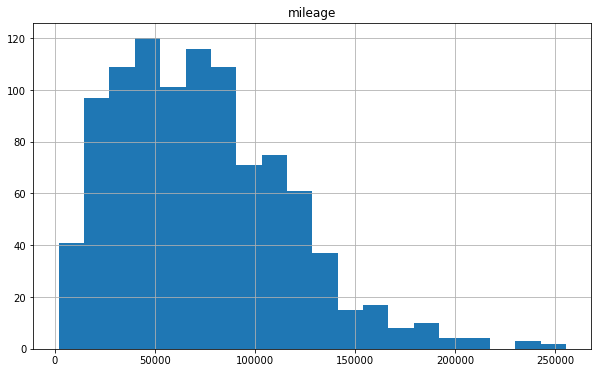

In [351]:
# histogram of mileage data to understand the underlying distribuition, which is R skewed

df.hist('mileage',bins= 20, figsize=(10,6))

<AxesSubplot:xlabel='mileage', ylabel='price'>

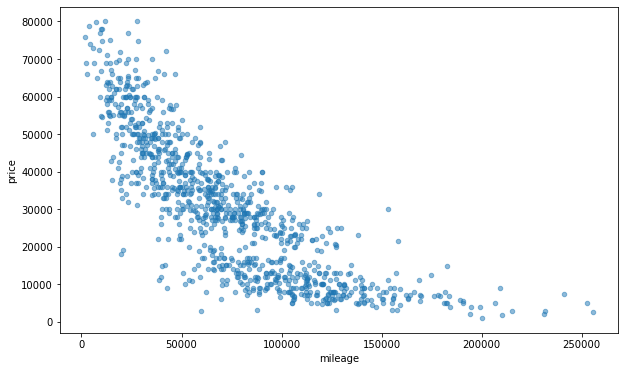

In [352]:
#scatter plot of mileage versus price

df.plot(kind="scatter", x = 'mileage', y='price', alpha=.5, figsize =(10,6))

In [353]:
# Build a linear regression model using sci-kit learn

lnmodel = LinearRegression()



In [354]:
# create two arrays, for the features and target form the data frame

X = np.asarray(df['mileage']).reshape(-1,1)
y = np.asarray(df['price']).reshape(-1,1)

In [355]:
# verify that the array values are correct

X[0:5,:]

array([[ 36858.],
       [ 46883.],
       [108759.],
       [ 35187.],
       [ 48153.]])

In [356]:
# verify shape

X.shape

(1000, 1)

In [357]:
# Build Linear Regression model using sci-kit learn

lnmodel.fit(X,y)

LinearRegression()

In [358]:
# make sure that the intercept and coefficients look reasonable given the data

lnmodel.intercept_, lnmodel.coef_

(array([56359.78447593]), array([[-0.34997452]]))

In [359]:
# get predictions (arrays must have correct dimensions, so need to shape X)

X_pred = np.array([[0],[X.max()]])
y_pred = lnmodel.predict(X_pred)


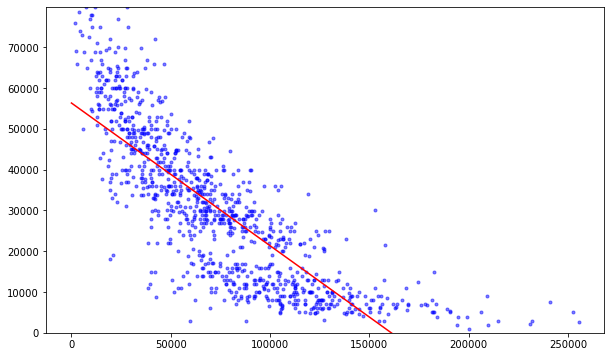

In [360]:
# plot results of linear regression model using scikit learn

fig = plt.figure(figsize = (10,6))

plt.plot(X,y,"b.", alpha=.5)
plt.plot(X_pred,y_pred, "r-")
plt.ylim(0,y.max())
plt.show()

In [361]:
# show the same linear regression method manually

# first create a matrix with a vector of ones (design matrix for our feature) in order to perform matrix multiplication

X_b = np.c_[np.ones((len(X),1)),X]
X_b[0:5,:]

array([[1.00000e+00, 3.68580e+04],
       [1.00000e+00, 4.68830e+04],
       [1.00000e+00, 1.08759e+05],
       [1.00000e+00, 3.51870e+04],
       [1.00000e+00, 4.81530e+04]])

In [362]:
# Perform matrix multiplication in order to get vector of beta values (weights in the linear regression equation) and match
# to the output of scikit learn

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 5.63597845e+04],
       [-3.49974525e-01]])

In [363]:
# get fitted line manually

X_pred_b = np.c_[np.ones((2,1)), X_pred]
y_pred = X_pred_b.dot(theta_best)
y_pred

array([[ 56359.78447593],
       [-33030.35862456]])

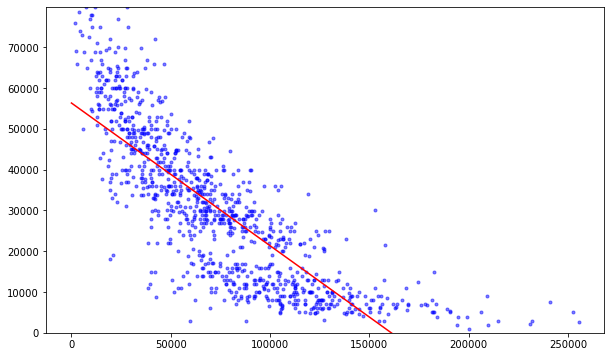

In [364]:
#check plots for both methods, they are the same

fig = plt.figure(figsize = (10,6))

plt.plot(X,y, "b.", alpha=.5)
plt.plot(X_pred,y_pred, "r-")
plt.ylim(0,y.max())
plt.show()


In [124]:
# compare to kNN regression, will use a test/train split further down.  This is to just show use of the model only.

# using sklearn knnregression 

knmodel.fit(X,y)

KNeighborsRegressor(n_neighbors=20)

In [366]:
#numpy.newaxis is used to explicitly increase the dimension of the existing array by one more dimension by either row or column

Xtest = np.sort(X[:,0])[:,np.newaxis]

In [367]:
# n x m dimensions are now 1000 x 1

Xtest.shape

(1000, 1)

In [123]:
# Make sure the data looks sorted and correct

Xtest[0:6,:]

array([[ 1997.],
       [ 4171.],
       [ 6422.],
       [ 8600.],
       [10103.],
       [12142.]])

In [369]:
# generate predictions

yhat = knmodel.predict(Xtest)

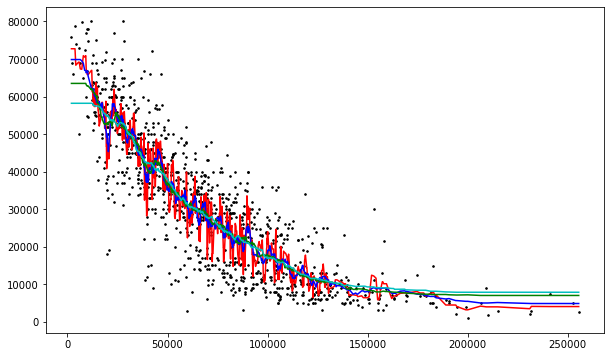

In [370]:
#show different regression fits based on different tuning paramters for n-neighbors

fig = plt.figure(figsize = (10,6))

num_k=[5,20,50,100]
mpl_colors = ['r', 'b', 'g', 'c', 'm', 'y']
plt.scatter(X,y,s=10,c='k',marker='.')
i=0
for n in (num_k):
    knmodel = KNeighborsRegressor(n_neighbors=n)
    knmodel.fit(X,y)
    yhat = knmodel.predict(Xtest)
    plt.plot(Xtest,yhat,mpl_colors[i])
    i+=1
   

In [1]:
fig, axes = plt.subplots(2,2,figsize=(15, 11))

# generate subplots for number of neighbors = 5,20,50,100
# note we didn't truly make a train test split for this model, so there are really not out of sample metrics

for n_neighbors, ax in zip([5, 20, 50, 100], axes.ravel()):
    knmodel = KNeighborsRegressor(n_neighbors=n_neighbors)
    knmodel.fit(X,y)
    ax.plot(X, y, '.', c='blue',   
             markersize=5)
    ax.plot(Xtest, knmodel.predict(Xtest), '.', c='red', markersize=5)
    ax.plot(Xtest, knmodel.predict(Xtest), c='black')
    
    ax.set_title("{} neighbors\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, knmodel.score(X, y),
        knmodel.score(Xtest, yhat)))
    ax.set_xlabel("Mileage")
    ax.set_ylabel("Price")

fig.tight_layout()

NameError: name 'plt' is not defined

The prediction for 100000 miles for the linear model is [[21362.33201527]]

The prediction for 100000 miles for the kNN model is [[17761.14]]



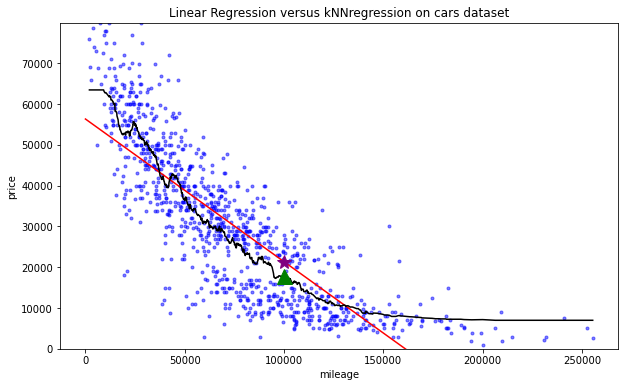

In [372]:
# plot linear regression and knnRegression comparitively using n = 50 for the n neighbors tuning paramter in the kNN regression

fig = plt.figure(figsize=(10,6))

knmodel = KNeighborsRegressor(n_neighbors=50)
knmodel.fit(X, y)

# predictions for 100,000 miles
X_new = [[100000]]
y_hatlin = lnmodel.predict(X_new)
y_hatknn = knmodel.predict(X_new)
print(f'The prediction for 100000 miles for the linear model is {y_hatlin}\n')
print(f'The prediction for 100000 miles for the kNN model is {y_hatknn}\n')

plt.plot(X,y, "b.", alpha=.5)
plt.plot(X_pred,y_pred, "r-")
plt.plot(Xtest, knmodel.predict(Xtest), 'black')
plt.plot(X_new,y_hatknn, marker="^", c='green', markersize=15)
plt.plot(X_new,y_hatlin, marker='*', c='purple', markersize=15)
plt.ylim(0,y.max())
plt.xlabel("mileage")
plt.ylabel("price")
plt.title("Linear Regression versus kNNregression on cars dataset")
plt.show()



In [373]:
# repeat using a train/test split on the cars data

myseed = 12
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=myseed, test_size=.2)


In [374]:
# train on linearmodel using our training data, our performance metric with be RMSE in-sample.

lnmodel.fit(Xtrain, ytrain)
lntrain_pred = lnmodel.predict(Xtrain)
lntrain_mse = mean_squared_error(ytrain,lntrain_pred)
lntrain_rmse = np.sqrt(lntrain_mse)
print(f'The RMSE for training data for the linear model is {lntrain_rmse}')


The RMSE for training data for the linear model is 10668.073482244672


In [375]:
# train on knnRegression using training data in-sample.

knmodel.fit(Xtrain,ytrain)
kntrain_pred = knmodel.predict(Xtrain)
kntrain_mse = mean_squared_error(ytrain,kntrain_pred)
kntrain_rmse = np.sqrt(kntrain_mse)
print(f'The RMSE for training data for the knnRegression model is {kntrain_rmse}')

The RMSE for training data for the knnRegression model is 9040.85888796258


In [376]:
# predict using linear model and test set and evalutate the results, model performance out of sample (test data)

lntest_pred = lnmodel.predict(Xtest)
lntest_mse = mean_squared_error(ytest,lntest_pred)
lntest_rmse = np.sqrt(lntest_mse)
print(f'The RMSE for test data for the linear model is {lntest_rmse}')

The RMSE for test data for the linear model is 10618.780290164157


In [377]:
# predict using knnRegression model and test set and evalutate the results

kntest_pred = knmodel.predict(Xtest)
kntest_mse = mean_squared_error(ytest,kntest_pred)
kntest_rmse = np.sqrt(kntest_mse)
print(f'The RMSE for test data for the knnRegression model is {kntest_rmse}')

The RMSE for test data for the knnRegression model is 9584.437314010562


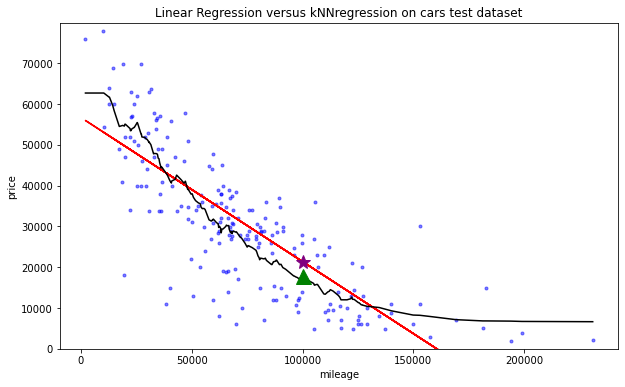

In [378]:
# plot linear regression and knnRegression comparitively using n = 50 for the n neighbors tuning paramter in the kNN regression
# on the test data

fig = plt.figure(figsize=(10,6))

plt.plot(Xtest,ytest, "b.", alpha=.5)
plt.plot(Xtest,lntest_pred, "r-")

Xtest = np.sort(Xtest[:,0])[:,np.newaxis]
plt.plot(Xtest, knmodel.predict(Xtest), 'black')
plt.plot(X_new,y_hatknn, marker="^", c='green', markersize=15)
plt.plot(X_new,y_hatlin, marker='*', c='purple', markersize=15)
plt.ylim(0,y.max())
plt.xlabel("mileage")
plt.ylabel("price")
plt.title("Linear Regression versus kNNregression on cars test dataset")
plt.show()

### Conclusion

- The relationship in the raw data between price and mileage is logical, as evident from the scatter plot of the data.  We would expect that as mileage increases, there would be a decrease in price.  
- kNN Regression clearly captures more of the signal for our dataset.  Even upon visual inspection, we can see that that the head and tail of the cars mileage v price data is not captured by the linear model.  The histogram distrubtion of the data also is suggestive that a model other than simple linear regression would likely not be appropriate.
- We decided, a priori, to use the RMSE as our compartivie performance metricts.  Our test and training data results were reasonable matched, giving us confidence in the model consistency and integrity.  THe linear model resulted in a RMSE of 
$10,618, while the kNN regression model resulted in a RMSE of $9,584.  
- The linear model predicted a vehicle price for a car with 100,00 miles at $21362.33 and the kNN model predicted a vehicle price for the same car at $17761.14.
- Comparing 4 different values of n (where n tuning paramter for the number of neighbors in the kNNregression model), n=5,20,50,100, just on the basis if the entire data without further validation or tuning parameter selection techniques, yielded a subjection selection of n=50.  I chose this as a trade off for for under and overfitting the data.  Realistically, this would have involved more objective techniques for optimization, but that is out of the scope of this homework assignment.  